<a href="https://colab.research.google.com/github/Alpesh202/FSFW-U-ML/blob/main/ANN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn tensorflow pandas numpy openpyxl matplotlib joblib scikeras mlxtend

In [2]:
# Data Handling
import pandas as pd
import numpy as np

# Data Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split, cross_val_score

# Machine Learning Models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Artificial neural network model
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from keras.optimizers import Adam, SGD, RMSprop
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from scikeras.wrappers import KerasClassifier
from keras.regularizers import l1, l2

# Model Evaluation
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Model Persistence - load and unload the model
import joblib

In [3]:
# Upload the data file into Colab Environment and define the path
file_path = "/content/Urine.xlsx"

# if Jupyter - then define the file path
# file_path = r'C:\Users\Alpesh\Desktop\RawData\Urine.xlsx'

# Read the Excel file into a Pandas DataFrame
df = pd.read_excel(file_path)

# Display the DataFrame
print(df)

    Group  HIPI_2.336_94.05351_CC_Spe  RPPI_1.43_96.06918_CC+HTP+OT_Spe  \
0      NU                1.019047e+06                      4.369687e+06   
1      NU                1.251668e+06                      3.461698e+06   
2      NU                1.826197e+06                      4.281905e+06   
3      NU                6.082321e+05                      1.511828e+07   
4      NU                2.545110e+06                      3.993454e+06   
..    ...                         ...                               ...   
175    OT                4.313545e+06                      3.042152e+07   
176    OT                2.890789e+06                      2.167816e+07   
177    OT                2.406921e+06                      7.114720e+07   
178    OT                1.670501e+06                      2.404034e+07   
179    OT                1.414180e+06                      1.774169e+07   

     HIPI_2.265_98.04838_CC_Spe  RPPI_2.289_100.10043_CC_Spe  \
0                  7.889221e+05    

In [4]:
# Encoding the categorical column into numerical values
label_dict = {'NU': 0, 'CC': 1, 'ECG': 2, 'HTP': 3, 'NRT': 4, 'OT': 5}
df['Group_encoded'] = df['Group'].map(label_dict)

# Display the first and last few rows of the DataFrame
df.head()
df.tail()

# Split the data into features (X) and target variable (y)
X = df.drop(['Group', 'Group_encoded'], axis=1)
y = df['Group_encoded']

# Display the features and target variable
X.head()
y.head()

# Display the shape of the dataset
print(X.shape)
print(y.shape)

# Split the data into training and testing sets in a stratified way
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42, stratify=y)

# Display the shapes of the splitted data
print(f'X_train.shape: {X_train.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'X_test.shape: {X_test.shape}')
print(f'y_test.shape: {y_test.shape}')


(180, 208)
(180,)
X_train.shape: (126, 208)
y_train.shape: (126,)
X_test.shape: (54, 208)
y_test.shape: (54,)


Epoch 1/50
4/4 [==============================] - 7s 225ms/step - loss: 2.2588 - accuracy: 0.1400 - val_loss: 1.3983 - val_accuracy: 0.3846 - lr: 0.0010
Epoch 2/50
4/4 [==============================] - 0s 70ms/step - loss: 1.6557 - accuracy: 0.3200 - val_loss: 1.3154 - val_accuracy: 0.3846 - lr: 0.0010
Epoch 3/50
4/4 [==============================] - 0s 55ms/step - loss: 1.4979 - accuracy: 0.4000 - val_loss: 1.2399 - val_accuracy: 0.5385 - lr: 0.0010
Epoch 4/50
4/4 [==============================] - 0s 49ms/step - loss: 1.3054 - accuracy: 0.5400 - val_loss: 1.1770 - val_accuracy: 0.5385 - lr: 0.0010
Epoch 5/50
4/4 [==============================] - 0s 53ms/step - loss: 1.2313 - accuracy: 0.5400 - val_loss: 1.1296 - val_accuracy: 0.5385 - lr: 0.0010
Epoch 6/50
4/4 [==============================] - 0s 46ms/step - loss: 1.1360 - accuracy: 0.6200 - val_loss: 1.0900 - val_accuracy: 0.6154 - lr: 0.0010
Epoch 7/50
4/4 [==============================] - 0s 44ms/step - loss: 0.9703 - accurac

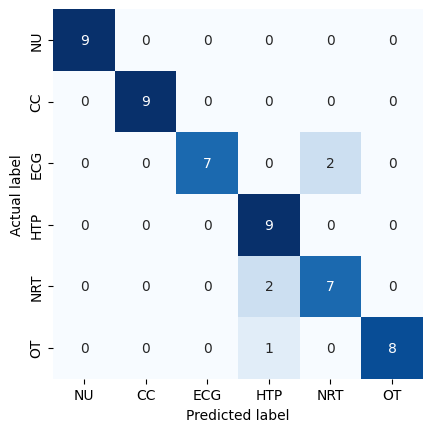

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense, BatchNormalization, Dropout
from keras.models import Sequential
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have X and y defined

# Encoding the categorical column into numerical values
label_dict = {'NU': 0, 'CC': 1, 'ECG': 2, 'HTP': 3, 'NRT': 4, 'OT': 5}
df['Group_encoded'] = df['Group'].map(label_dict)

# Split the data into features (X) and target variable (y)
X = df.drop(['Group', 'Group_encoded'], axis=1)
y = df['Group_encoded']

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42, stratify=y)

# Apply SMOTE for class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Standardize features
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Define a more complex neural network with Batch Normalization and Dropout
model = Sequential()
model.add(Dense(256, input_dim=208, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(6, activation='softmax'))

# Compile the model with Adam optimizer and a reduced learning rate
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks for early stopping and learning rate schedule
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
lr_schedule = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=20, min_lr=1e-6)

# Train the model
hist = model.fit(
    X_train_resampled_scaled, to_categorical(y_train_resampled),
    epochs=50, batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, lr_schedule]
)

# One-hot encode target labels for evaluation
y_test_encoded = to_categorical(y_test, num_classes=6)

# Evaluate the model on the test set
_, accuracy = model.evaluate(X_test_scaled, y_test_encoded)
print(f'\nAccuracy on the test set: {accuracy}')

# Predict the class probabilities on the test set
y_predicted_prob = model.predict(X_test_scaled)

# Convert predicted probabilities to class labels
y_predicted = np.argmax(y_predicted_prob, axis=1)

# Compute the confusion matrix
mat = confusion_matrix(y_test, y_predicted)

# Plot the confusion matrix
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=label_dict.keys(),
            yticklabels=label_dict.keys())

plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()
